In [ ]:
import pandas as pd
import numpy as np
import joblib
import re
import string
#train test split(the data is splitted into training and testing data)
from sklearn.model_selection import train_test_split
#it is used to extract features from text data(convert text into numbers)
from sklearn.feature_extraction.text import TfidfVectorizer
#the model we will be using in this mp
from sklearn.linear_model import LogisticRegression

#this is used to measure accuracy(f1 score, precision, recall)of the model
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report   

from nltk.stem.porter import PorterStemmer
#it eliminates the common words from the text data
from nltk.corpus import stopwords





In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muaaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
true=pd.read_csv('True.csv')
fake=pd.read_csv('Fake.csv')

In [ ]:
true['label']=1
fake['label']=0

In [ ]:
true.isna()

,title,text,subject,date,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
21405,False,False,False,False,False
21406,False,False,False,False,False
21407,False,False,False,False,False
21408,False,False,False,False,False


In [ ]:
true.loc[2,'title']

"Senior U.S. Republican senator: 'Let Mr. Mueller do his job'"

In [ ]:
true.loc[3:5,'title']

3    FBI Russia probe helped by Australian diplomat...
4    Trump wants Postal Service to charge 'much mor...
5    White House, Congress prepare for talks on spe...
Name: title, dtype: object

In [ ]:
merged_data=pd.concat([true,fake],axis=0)

In [ ]:
merged_data.sample(20)

,title,text,subject,date,label
15341,"HILLARY: “Trump Is Offensive To Women, But So ...",Really Hillary? Why don t you tell us about me...,politics,"Aug 11, 2015",0
18943,FAKE NEWS! MAXINE WATERS and JOY REID Make Out...,,left-news,"Mar 20, 2017",0
3891,Trump travel ban back in U.S. courts next week...,NEW YORK/SAN FRANCISCO (Reuters) - Legal chall...,politicsNews,"May 5, 2017",1
3837,Trump U.S. antitrust nominee says will be inde...,"WASHINGTON (Reuters) - Makan Delrahim, who was...",politicsNews,"May 10, 2017",1
16031,MEDIA IGNORES! HOUSE DEM IT SUSPECTS Wanted Un...,The media has ignored the case of Muslim Broth...,Government News,"Jul 5, 2017",0
20534,TRUMP COMES OUT SWINGING: New Ad Features One ...,Bill s gonna wish his corrupt wife never ran f...,left-news,"May 23, 2016",0
736,Democrats working on independent Russia probe,WASHINGTON (Reuters) - Democrats on the U.S. S...,politicsNews,"November 8, 2017",1
21574,WALMART WILL MELT CLASS RINGS WITH CONFEDERATE...,An Arkansas woman who went to pick up the clas...,left-news,"Jul 11, 2015",0
20708,Germany sees jump in citizenship applications ...,BERLIN (Reuters) - German consulates in the Un...,worldnews,"September 7, 2017",1
8323,All Ammosexual Hell Breaks Loose On Twitter B...,When comedian Alison Leiby tweeted a pretty cu...,News,"February 5, 2016",0


In [ ]:
# merged_data = merged_data.drop(['subject', 'date'], axis=1,)

In [ ]:
merged_data=merged_data.drop(['subject','date','title'],axis=1)

In [ ]:
merged_data = merged_data.sample(frac=1).reset_index(drop=True)

In [ ]:
merged_data.head(12)

,title,text,label
0,Trump says to host India's Modi for U.S. visit...,WASHINGTON (Reuters) - U.S. President Donald T...,1
1,TRUMP AND SECRET SERVICE FORCED To Take Last M...,WATCH: @realDonaldTrump exits his speech in Ca...,0
2,WATCH: Joy Behar CRUSHES Newt Gingrich On ‘Th...,Newt Gingrich just got owned by the ladies of ...,0
3,"GARY JOHNSON: Meet The “Creepy” Pro-Amnesty, A...",For anyone who believes they re more CONSERVAT...,0
4,LEFTIST REPORTERS Tie Hillary To Firing Of #Ma...,"Once again, the left eats its own Liberal repo...",0
5,CNN Analyst: White Militia Are Not A Threat B...,People have been quick to point out that there...,0
6,China extends national anthem 'disrespect' law...,BEIJING (Reuters) - China s largely rubber-sta...,1
7,House Republican tax chief says lawmakers want...,WASHINGTON (Reuters) - The chief Republican ta...,1
8,Looks Like Sarah Palin Is About To Become The...,"When you try and fail at everything you do, tr...",0
9,Sri Lanka arrests 19 after Buddhist-Muslim vio...,COLOMBO (Reuters) - Sri Lankan police arrested...,1


In [ ]:
merged_data

,title,text,label
0,Trump says to host India's Modi for U.S. visit...,WASHINGTON (Reuters) - U.S. President Donald T...,1
1,TRUMP AND SECRET SERVICE FORCED To Take Last M...,WATCH: @realDonaldTrump exits his speech in Ca...,0
2,WATCH: Joy Behar CRUSHES Newt Gingrich On ‘Th...,Newt Gingrich just got owned by the ladies of ...,0
3,"GARY JOHNSON: Meet The “Creepy” Pro-Amnesty, A...",For anyone who believes they re more CONSERVAT...,0
4,LEFTIST REPORTERS Tie Hillary To Firing Of #Ma...,"Once again, the left eats its own Liberal repo...",0
...,...,...,...
44886,WATCH: Trump Caught On Video Praising One Of ...,"Donald Trump held a campaign rally in Raleigh,...",0
44887,WATCH: Video Shows Cops TRYING To Run Over Bl...,In something you might expect from a video gam...,0
44888,HYPOCRITE HILLARY Shows At The Gay Pride Parad...,Isn t this just the height of hypocrisy? Hilla...,0
44889,"Trump invites leaders of Thailand, Singapore t...",WASHINGTON (Reuters) - U.S. President Donald T...,1


In [ ]:

merged_data['text'] = merged_data['text'].str.lower()


In [ ]:
merged_data

,title,text,label
0,Trump says to host India's Modi for U.S. visit...,washington (reuters) - u.s. president donald t...,1
1,TRUMP AND SECRET SERVICE FORCED To Take Last M...,watch: @realdonaldtrump exits his speech in ca...,0
2,WATCH: Joy Behar CRUSHES Newt Gingrich On ‘Th...,newt gingrich just got owned by the ladies of ...,0
3,"GARY JOHNSON: Meet The “Creepy” Pro-Amnesty, A...",for anyone who believes they re more conservat...,0
4,LEFTIST REPORTERS Tie Hillary To Firing Of #Ma...,"once again, the left eats its own liberal repo...",0
...,...,...,...
44886,WATCH: Trump Caught On Video Praising One Of ...,"donald trump held a campaign rally in raleigh,...",0
44887,WATCH: Video Shows Cops TRYING To Run Over Bl...,in something you might expect from a video gam...,0
44888,HYPOCRITE HILLARY Shows At The Gay Pride Parad...,isn t this just the height of hypocrisy? hilla...,0
44889,"Trump invites leaders of Thailand, Singapore t...",washington (reuters) - u.s. president donald t...,1


In [ ]:
ps=PorterStemmer()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    #removes links, html tags, and punctuation
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    #removes references to other articles
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\W', ' ', text)


    text = re.sub(r'\n+', ' ', text)
    text = text.split()
    text=[ps.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)

    return text


In [ ]:
merged_data['text'] = merged_data['text'].apply(preprocess)

In [ ]:
merged_data

,title,text,label
0,Trump says to host India's Modi for U.S. visit...,washington reuter u presid donald trump invit ...,1
1,TRUMP AND SECRET SERVICE FORCED To Take Last M...,watch realdonaldtrump exit speech california c...,0
2,WATCH: Joy Behar CRUSHES Newt Gingrich On ‘Th...,newt gingrich got own ladi view tuesday night ...,0
3,"GARY JOHNSON: Meet The “Creepy” Pro-Amnesty, A...",anyon believ conserv averag trump support plan...,0
4,LEFTIST REPORTERS Tie Hillary To Firing Of #Ma...,left eat liber report use unexpect fire nbc ne...,0
...,...,...,...
44886,WATCH: Trump Caught On Video Praising One Of ...,donald trump held campaign ralli raleigh north...,0
44887,WATCH: Video Shows Cops TRYING To Run Over Bl...,someth might expect video game instead real li...,0
44888,HYPOCRITE HILLARY Shows At The Gay Pride Parad...,height hypocrisi hillari clinton show ny gay p...,0
44889,"Trump invites leaders of Thailand, Singapore t...",washington reuter u presid donald trump spoke ...,1


In [ ]:
x=merged_data['text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)




In [ ]:
lreg=LogisticRegression()
lreg.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred=lreg.predict(xv_test)
lreg.score(xv_test,y_test)

0.9870809667000779

In [ ]:
print(accuracy_score(y_test,pred))

0.9870809667000779


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4661
           1       0.98      0.99      0.99      4318

    accuracy                           0.99      8979
   macro avg       0.99      0.99      0.99      8979
weighted avg       0.99      0.99      0.99      8979



In [ ]:
joblib.dump(vectorizer,'vectorizer.joblib')
joblib.dump(lreg,'model.joblib')


['model.joblib']

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
confusion_matrix(y_test,pred)
import matplotlib.pyplot as plt

In [ ]:
y_pred=lreg.predict(xv_test)


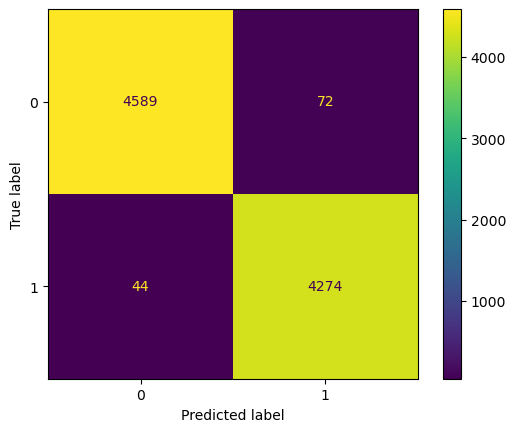

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4661
           1       0.98      0.99      0.99      4318

    accuracy                           0.99      8979
   macro avg       0.99      0.99      0.99      8979
weighted avg       0.99      0.99      0.99      8979



In [2]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
